3. Time series

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [5]:
url = "https://raw.githubusercontent.com/atikagondal/Lab-2023-DAVE3625/main/Lab3/data/flight.csv"
#Find the raw url from the github repo
df = pd.read_csv(url)
df.head()

,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest
0,0,2013-1-1 05:40:00,2013-1-1 05:42:00,2013-1-1 09:23:00,2013-1-1 08:50:00,1141,JFK,MIA
1,1,2013-1-1 06:00:00,2013-1-1 05:54:00,2013-1-1 08:12:00,2013-1-1 08:37:00,461,LGA,ATL
2,2,2013-1-1 05:58:00,2013-1-1 05:54:00,2013-1-1 07:40:00,2013-1-1 07:28:00,1696,EWR,ORD
3,3,2013-1-1 06:00:00,2013-1-1 05:55:00,2013-1-1 09:13:00,2013-1-1 08:54:00,507,EWR,FLL
4,4,2013-1-1 06:00:00,2013-1-1 05:57:00,2013-1-1 08:38:00,2013-1-1 08:46:00,79,JFK,MCO


In [10]:
#Convert column to datetime
df.info() #Printing before and after the conversion


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121427 entries, 0 to 121426
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Unnamed: 0      121427 non-null  int64         
 1   datetime_val    121427 non-null  datetime64[ns]
 2   dep_time        121427 non-null  object        
 3   arr_time        121427 non-null  object        
 4   sched_arr_time  121427 non-null  object        
 5   flight          121427 non-null  int64         
 6   origin          121427 non-null  object        
 7   dest            121427 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 7.4+ MB


In [15]:
df['datetime_val'] = pd.to_datetime(df['datetime_val'])
df['dep_time'] = pd.to_datetime(df['dep_time'], errors='coerce') #Here I have used coerce to convert the values that are not in the right format to NaT)
df['arr_time'] = pd.to_datetime(df['arr_time'], errors='coerce') #Here I have used coerce to convert the values that are not in the right format to NaT)
df['sched_arr_time'] = pd.to_datetime(df['sched_arr_time'], errors='coerce') #Here I have used coerce to convert the values that are not in the right format to NaT)
df.info() #Here you can see I have changed the values to datetime64[ns] on datetime_val, dep_time, arr_time, sched_arr_time

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121427 entries, 0 to 121426
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Unnamed: 0      121427 non-null  int64         
 1   datetime_val    121427 non-null  datetime64[ns]
 2   dep_time        121421 non-null  datetime64[ns]
 3   arr_time        121379 non-null  datetime64[ns]
 4   sched_arr_time  121427 non-null  datetime64[ns]
 5   flight          121427 non-null  int64         
 6   origin          121427 non-null  object        
 7   dest            121427 non-null  object        
dtypes: datetime64[ns](4), int64(2), object(2)
memory usage: 7.4+ MB


Calculate the following:

1. air_time dep_time - arr_time
2. Delay arr_time – sched_arr_time
3. Delay as a percent of air time 
(air_time != 0) dep_delay / air_time

In [30]:
# When the columns are converted to datetime, you can add and substract time from the columns
#Adding a new row with the difference between the scheduled arrival time and the actual arrival time
df['air_time'] = df['dep_time'] - df['arr_time']
df['delay'] = df['arr_time'] - df['sched_arr_time']


In [32]:
df.head()

,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,air_time,delay,delay_percent
0,0,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,-1 days +20:19:00,0 days 00:33:00,-14.932127
1,1,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,-1 days +21:42:00,-1 days +23:35:00,18.115942
2,2,2013-01-01 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,-1 days +22:14:00,0 days 00:12:00,-11.320755
3,3,2013-01-01 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,-1 days +20:42:00,0 days 00:19:00,-9.595960
4,4,2013-01-01 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,-1 days +21:19:00,-1 days +23:52:00,4.968944


In [35]:

#Need to fix negative values at arr_time 
for index, row in df.iterrows():
    #if arr_time is less then dep_time
    if (row['arr_time']<row['dep_time']):
        print(row['arr_time'])
        #add one day to arr_time
        df.loc[index, 'arr_time'] = (row['arr_time'])+ datetime.timedelta(days=1)
    if (row['sched_arr_time']<row['dep_time']):
        df.loc[index, 'sched_arr_time'] = (row['sched_arr_time'])+ datetime.timedelta(days=1)


df.head()

,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,air_time,delay,delay_percent
0,0,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,-1 days +20:19:00,0 days 00:33:00,-14.932127
1,1,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,-1 days +21:42:00,-1 days +23:35:00,18.115942
2,2,2013-01-01 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,-1 days +22:14:00,0 days 00:12:00,-11.320755
3,3,2013-01-01 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,-1 days +20:42:00,0 days 00:19:00,-9.595960
4,4,2013-01-01 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,-1 days +21:19:00,-1 days +23:52:00,4.968944


In [38]:
for index, row in df.iterrows():
    #if row 'air_time' is less then 0, replace the valude with 24 hours-air_time + abs(days)
    if (row['air_time'].days <0):
        df.loc[index, 'air_time'] = datetime.timedelta(hours=24)-(row['air_time'] + datetime.timedelta(abs(row['air_time'].days)))

In [39]:
df.head()

,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,air_time,delay,delay_percent
0,0,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:41:00,0 days 00:33:00,-14.932127
1,1,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:18:00,-1 days +23:35:00,18.115942
2,2,2013-01-01 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:46:00,0 days 00:12:00,-11.320755
3,3,2013-01-01 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 03:18:00,0 days 00:19:00,-9.595960
4,4,2013-01-01 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:41:00,-1 days +23:52:00,4.968944


In [44]:
df['delay_percent'] = df['delay']/df['air_time']*100
#df['delay_percent'] = abs(df['delay']/df['air_time'])*100 (absolute, is that correct?)
df.head()

,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,air_time,delay,delay_percent
0,0,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:41:00,0 days 00:33:00,14.932127
1,1,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:18:00,-1 days +23:35:00,18.115942
2,2,2013-01-01 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:46:00,0 days 00:12:00,11.320755
3,3,2013-01-01 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 03:18:00,0 days 00:19:00,9.595960
4,4,2013-01-01 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:41:00,-1 days +23:52:00,4.968944


<Axes: >

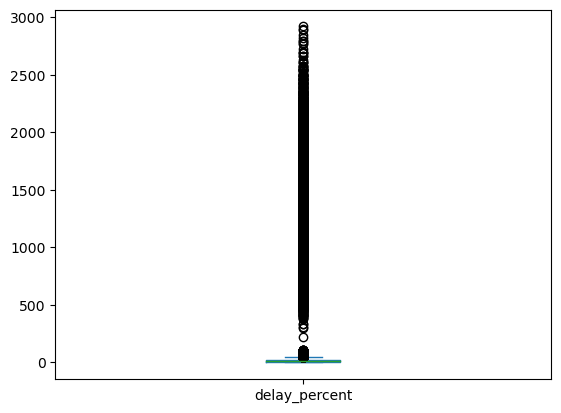

In [45]:
df['delay_percent'].plot.box()

In [46]:
minrow= df['delay_percent'].argmin()

In [47]:
df.iloc[minrow]

Unnamed: 0                         57
datetime_val      2013-01-01 08:10:00
dep_time          2013-01-01 08:07:00
arr_time          2013-01-01 10:43:00
sched_arr_time    2013-01-01 10:43:00
flight                            269
origin                            JFK
dest                              ATL
air_time              0 days 02:36:00
delay                 0 days 00:00:00
delay_percent                     0.0
Name: 57, dtype: object

a huge dataset, and the hacky way to fix negative airtime, don't work 100%, so lets remove some outliers. Do a df["percent_delay"].plot.box() to check outliers, and a df["percent_delay"].describe() to see the min and max values 

In [48]:
df['delay_percent'].describe()

count    121373.000000
mean         44.018609
std         204.025934
min           0.000000
25%           5.333333
50%          11.656442
75%          22.159091
max        2919.565217
Name: delay_percent, dtype: float64

To make it easy to do remove outliers later on, lets make it a function:

In [51]:
from pandas.api.types import is_numeric_dtype
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    if is_numeric_dtype(df):
        df = df[(df > quant_df.loc[low]) & (df < quant_df.loc[high])]
    return df

#call the function
df['delay_percent'] = remove_outlier(df['delay_percent'])

<Axes: >

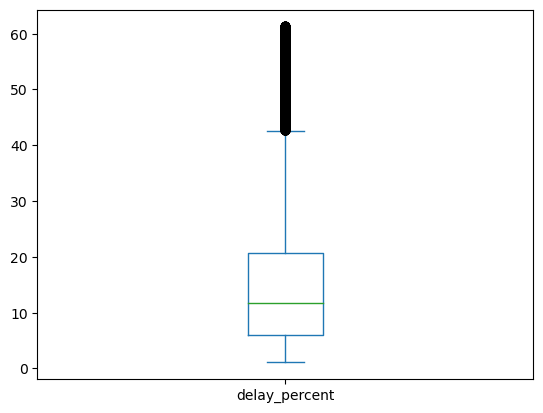

In [53]:
#Check the plot again. 
df['delay_percent'].plot.box()